In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet


In [58]:
conda install -c conda-forge fbprophet

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done


# All requested packages already installed.



In [59]:
df = pd.read_csv("Desktop\DS\MS Stock prediction\\Microsoft_Stock.csv")

In [60]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [61]:
df.Date

0        4/1/2015 16:00:00
1        4/2/2015 16:00:00
2        4/6/2015 16:00:00
3        4/7/2015 16:00:00
4        4/8/2015 16:00:00
               ...        
1506    3/25/2021 16:00:00
1507    3/26/2021 16:00:00
1508    3/29/2021 16:00:00
1509    3/30/2021 16:00:00
1510    3/31/2021 16:00:00
Name: Date, Length: 1511, dtype: object

In [62]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [198]:
df_clean = df.drop(['Open','High','Low','Volume'], axis = 1)

<AxesSubplot:>

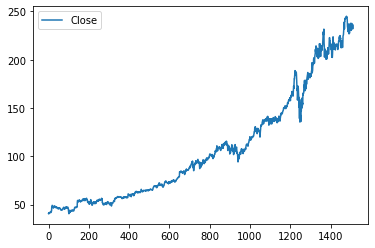

In [199]:
df_clean.plot()

In [181]:
df_clean.head()

,Date,Close
0,4/1/2015 16:00:00,40.72
1,4/2/2015 16:00:00,40.29
2,4/6/2015 16:00:00,41.55
3,4/7/2015 16:00:00,41.53
4,4/8/2015 16:00:00,41.42


In [201]:
df_clean.columns = ['ds','y']
df_clean.head()

,ds,y
0,4/1/2015 16:00:00,40.72
1,4/2/2015 16:00:00,40.29
2,4/6/2015 16:00:00,41.55
3,4/7/2015 16:00:00,41.53
4,4/8/2015 16:00:00,41.42


In [203]:
df_clean.ds.dtype

dtype('O')

In [204]:
df_clean.ds = pd.to_datetime(df_clean.ds)

In [205]:
df_clean.ds = df_clean.ds.dt.date

In [206]:
df_clean.ds.head()

0    2015-04-01
1    2015-04-02
2    2015-04-06
3    2015-04-07
4    2015-04-08
Name: ds, dtype: object

In [183]:
df_clean.describe()

,y
count,1511.000000
mean,107.422091
std,56.702299
min,40.290000
25%,57.855000
50%,93.860000
75%,138.965000
max,244.990000


In [207]:
df_clean = df_clean.iloc[:600,:]
df_clean.describe()

,y
count,600.000000
mean,56.086300
std,8.521522
min,40.290000
25%,49.762500
50%,55.105000
75%,63.035000
max,74.220000


In [208]:
df_clean.ds.dtypes

dtype('O')

In [209]:
df_clean.ds = pd.to_datetime(df_clean.ds)

C:\Users\arkarmak\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [210]:
df_clean.ds.dtypes

dtype('<M8[ns]')

In [211]:
from fbprophet import Prophet

In [212]:
# Initialize the Model
model=Prophet(daily_seasonality = True)

In [213]:
model.fit(df_clean)

In [222]:
### Create future dates of 365 days
future_data = model.make_future_dataframe(periods=60)

In [223]:
future_data.tail()

,ds
655,2017-10-11
656,2017-10-12
657,2017-10-13
658,2017-10-14
659,2017-10-15


In [224]:
forecast_data = model.predict(future_data)

In [225]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
655,2017-10-11,74.417713,72.148316,76.554717
656,2017-10-12,74.513267,72.292534,76.642560
657,2017-10-13,74.767505,72.583326,76.961782
658,2017-10-14,74.620307,72.337162,76.902568
659,2017-10-15,74.831559,72.638428,76.869033


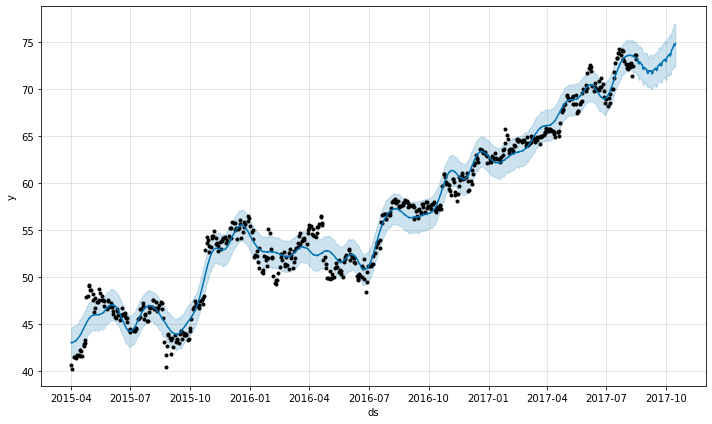

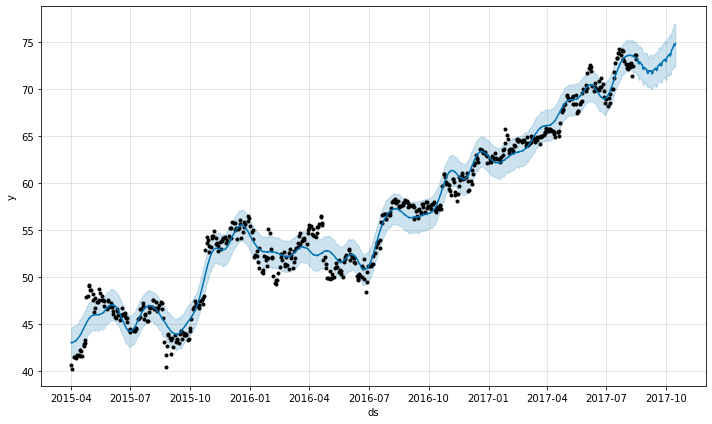

In [226]:
### plot the predicted projection
model.plot(forecast_data)

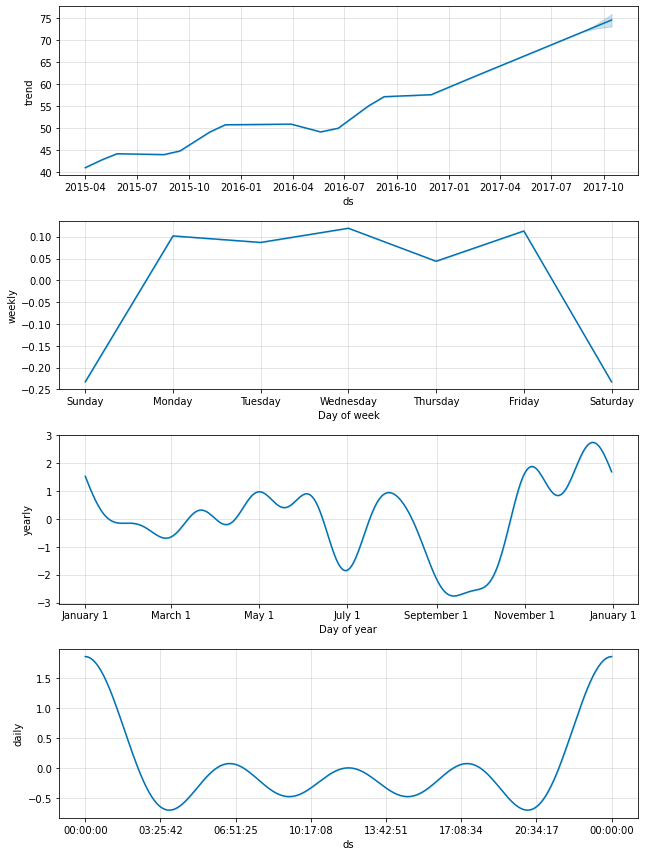

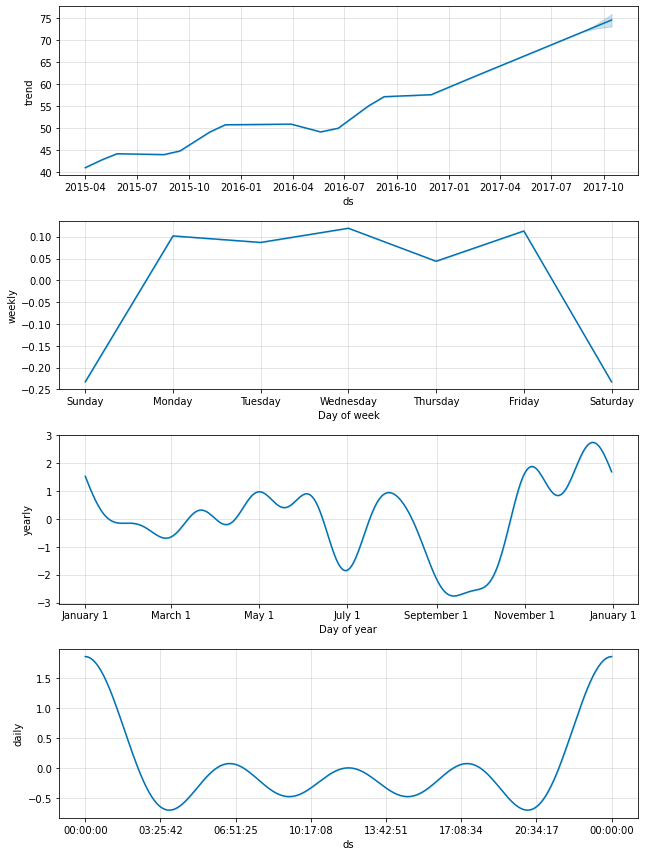

In [227]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(forecast_data)

In [228]:
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_clean["y"], name= 'Actual')
predict_chart = go.Scatter(y=forecast_data["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=forecast_data["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=forecast_data["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'